In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
from PIL import Image
from wordcloud import WordCloud
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = (10, 5)

In [4]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [5]:
# Dataset 1 (Ramen Ratings)

In [6]:
ramen_rater = pd.read_excel("Ramen_Data.xlsx", sheet_name="The Ramen Rater - Big List Of A")
ramen_rater.head()





,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2700,Vedan,Jhen Mian Tang Spicy Hot Noodle,Pack,Taiwan,4,NaN
1,2699,Myojo,Chicken Shio Wanton Noodles,Bowl,Japan,4.5,NaN
2,2698,Nissin,Cup Noodles Chilli Crab Flavour (More Crabtastic),Cup,Singapore,4,NaN
3,2697,Maruchan,Bowl Taste Of Asia Hot & Spicy Kimchi Ramen Ra...,Bowl,United States,3.25,NaN
4,2696,Nongshim,Neoguri Spicy Seafood Noodle Soup,Cup,United States,5,NaN


In [7]:
ramen_rater.sample(10)


,Review #,Brand,Variety,Style,Country,Stars,Top Ten
1015,1685,Wugudaochang,Chef's Grains Pea Noodle,Pack,China,4,NaN
1017,1683,Wugudaochang,Sour Soup & Minced Meat Flavor Chef's Grain Na...,Pack,China,5,NaN
2146,554,Yum Yum,Shrimp Tom Yum Flavor,Pack,Thailand,3.5,NaN
2126,574,Maggi,2 Minute Noodles Tricky Tomato,Pack,India,3.75,NaN
29,2671,Acecook,Mochi Mochi Yakisoba,Cup,Japan,4.5,NaN
31,2669,KOKA,Silk Instant Rice Fettucine Chicken Pho Flavor,Pack,Singapore,4,NaN
797,1903,Higashimaru,Tonkotsu Ramen,Pack,Japan,4.5,NaN
1112,1588,Mi E-Zee,Perisa Bayam,Pack,Malaysia,3.5,NaN
540,2160,Menraku,Japanese Yakisoba Umami Sauce,Bowl,Japan,5,NaN
1988,712,Four Seas,Seaweed,Bowl,Hong Kong,3.25,NaN


In [8]:
ramen_rater["Brand"].value_counts()

Nissin               399
Nongshim             103
Maruchan              81
Myojo                 72
Mama                  71
                    ... 
President              1
La Moderna             1
Tokachimen Koubou      1
Kimura                 1
Westbrae               1
Name: Brand, Length: 369, dtype: int64

In [36]:
type_ramen= ramen_rater["Style"].value_counts()

print(type_ramen)

Pack          1594
Bowl           514
Cup            470
Tray           111
Box              6
Restaurant       1
Can              1
Bar              1
Name: Style, dtype: int64


In [10]:
ramen_rater["Country"].value_counts()

Japan            381
United States    340
South Korea      326
Taiwan           229
Thailand         191
China            175
Malaysia         158
Hong Kong        144
Indonesia        141
Singapore        122
Vietnam          108
UK                69
Philippines       47
Canada            41
India             39
Germany           27
Mexico            25
Australia         22
Netherlands       15
Nepal             14
Myanmar           14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Cambodia           5
Brazil             5
Poland             4
Holland            4
Fiji               4
Sarawak            3
Sweden             3
Finland            3
Dubai              3
Estonia            2
Nigeria            2
Ghana              2
Phlippines         1
Name: Country, dtype: int64

In [11]:
ramen_rater["Top Ten"].value_counts()

\n          4
2016 #10    1
2012 #10    1
2014 #1     1
2013 #1     1
2013 #2     1
2013 #4     1
2013 #9     1
2013 #3     1
2012 #7     1
2016 #1     1
2012 #5     1
2012 #3     1
2012 #6     1
2012 #9     1
2012 #1     1
2012 #2     1
2013 #6     1
2014 #6     1
2014 #5     1
2014 #8     1
2014 #10    1
2016 #8     1
2016 #5     1
2016 #9     1
2016 #7     1
2015 #10    1
2015 #7     1
2015 #4     1
2015 #9     1
2015 #6     1
2015 #1     1
2013 #10    1
2015 #8     1
2014 #7     1
2014 #4     1
2014 #9     1
2012 #4     1
Name: Top Ten, dtype: int64

In [45]:
tops = ramen_rater[[type(x)is str for x in ramen_rater["Top Ten"]]]
tops[["#1" in x for x in tops["Top Ten"]]]

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
736,1964,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5,2016 #10
753,1947,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5,2016 #1
1062,1638,A-Sha Dry Noodle,Veggie Noodle Tomato Noodle With Vine Ripened ...,Pack,Taiwan,5,2015 #10
1200,1500,MyKuali,Penang Red Tom Yum Goong Noodle,Pack,Malaysia,5,2015 #1
1229,1471,Mama,Instant Noodles Shrimp Creamy Tom Yum Flavour ...,Pack,Thailand,5,2013 #10
1398,1302,Mama,Instant Noodles Yentafo Tom Yum Mohfai Flavour,Pack,Thailand,5,2014 #10
1613,1087,MyKuali,Penang White Curry Noodle,Pack,Malaysia,5,2014 #1
1708,992,Prima Taste,Singapore Laksa La Mian,Pack,Singapore,5,2013 #1
2092,608,Koka,Spicy Black Pepper,Pack,Singapore,5,2012 #10
2595,105,Indomie,Special Fried Curly Noodle,Pack,Indonesia,5,2012 #1


In [42]:
bars = ramen_rater['Variety']
bar_list = bars.to_list()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

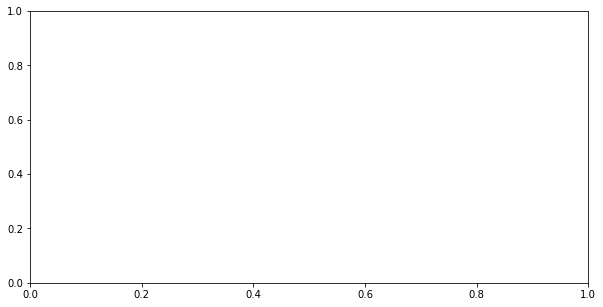

In [43]:
# Make a dataset x/y units:
height = [1,2,3,4,5]
bar_list
y_pos = np.arange(len(bar_list))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bar_list)

# Show graphic
plt.show()

In [13]:
#wordcloud plot
Text = ramen_rater['Variety']
Text.head()



0                      Jhen Mian Tang Spicy Hot Noodle
1                          Chicken Shio Wanton Noodles
2    Cup Noodles Chilli Crab Flavour (More Crabtastic)
3    Bowl Taste Of Asia Hot & Spicy Kimchi Ramen Ra...
4                    Neoguri Spicy Seafood Noodle Soup
Name: Variety, dtype: object

In [14]:
list_of_variety = Text.to_list()



In [15]:
texts= list_of_variety[10]

texts=" ".join(review for review in list_of_variety)
print ("There are {} words in the combination of all reviewed ramen flavours.".format(len(texts)))

There are 82856 words in the combination of all reviewed ramen flavours.


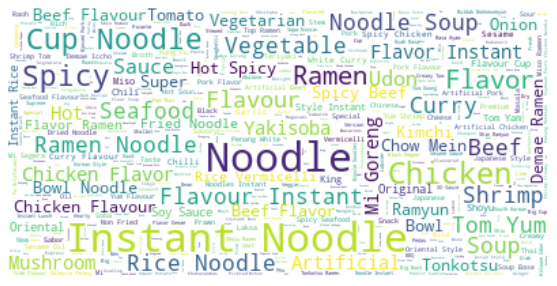

In [16]:
wordcloud = WordCloud(background_color="white",margin=2, min_font_size= 2, max_font_size=30, max_words= 1000, min_word_length=0).generate(texts)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
bowl_mask = np.array(Image.open("istockphoto-874666510-612x612.jpg"))
bowl_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [18]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [19]:
transformed_bowl_mask = np.ndarray((bowl_mask.shape[0], bowl_mask.shape[1]), np.int32)

for i in range (len(bowl_mask)):
    transformed_bowl_mask[i]= list(map(transform_format, bowl_mask[i]))

In [20]:
transformed_bowl_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

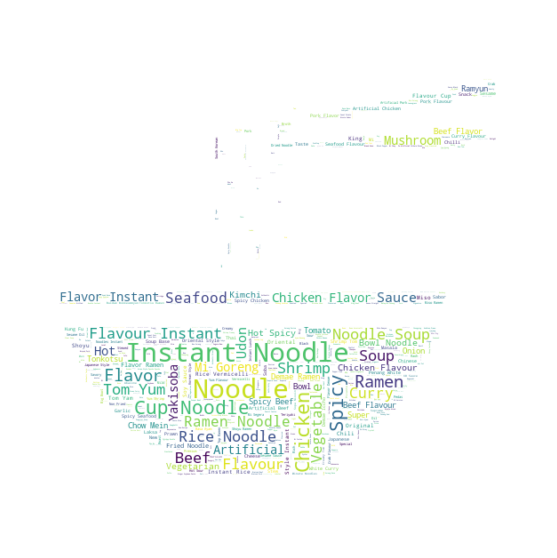

In [21]:
wc = WordCloud(background_color="white", max_words=1000, min_font_size= 1, max_font_size=30, mask=transformed_bowl_mask)

wc.generate(texts)


wc.to_file("ramen.jpg")

plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation= "bilinear")
plt.axis("off")
plt.show()

In [22]:
noodle_mask = np.array(Image.open("images (3).png"))
noodle_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [23]:
def transform_format (val):
    if val == 0:
        return 255
    else:
        return val

In [24]:
transformed_noodle_mask = np.ndarray((noodle_mask.shape[0], noodle_mask.shape[1]), np.int32)

for i in range(len(noodle_mask)):
    transformed_noodle_mask[i] = list(map(transform_format, noodle_mask[i]))

In [25]:
transformed_noodle_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

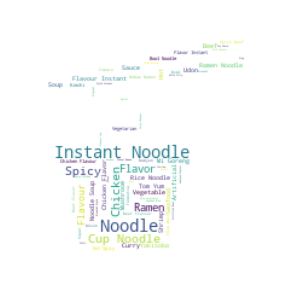

In [26]:
wc = WordCloud(background_color="white", max_words=1000, min_font_size= 2, max_font_size=30, mask=transformed_noodle_mask, contour_color="red")

wc.generate(texts)

wc.to_file("images (1).png")

plt.figure(figsize=[5,5])
plt.imshow(wc, interpolation= "bilinear")
plt.axis("off")
plt.show()

In [27]:
# Dataset 2 (Ramen Demands)
# 56 list of countries and their demands for ramen -> digits are in millions 

In [28]:
ramen_demands =pd.read_excel("Ramen_Data.xlsx", sheet_name="Demands for Instant Noodles ")
ramen_demands.head()




,Countries/Region,2016,2017,2018,2019,2020
0,China,38520.0,38960.0,40250,41450,46350
1,Indonesia,13010.0,12620.0,12540,12520,12640
2,Viet Nam,4920.0,5060.0,5200,5430,7030
3,India,4270.0,5420.0,6060,6730,6730
4,Japan,5660.0,5660.0,5780,5630,5970


In [29]:
ramen_demands.set_index("Countries/Region", inplace=True)


In [30]:
ramen_demands.tail()

,2016,2017,2018,2019,2020
Countries/Region,,,,,
Finland,10.0,10.0,10,10,10
Switzerland,10.0,10.0,10,10,10
Argentina,10.0,10.0,10,10,4
Others,1070.0,1310.0,1010,860,800
Total,97520.0,100110.0,103620,106420,116560


<AxesSubplot:xlabel='Countries/Region'>

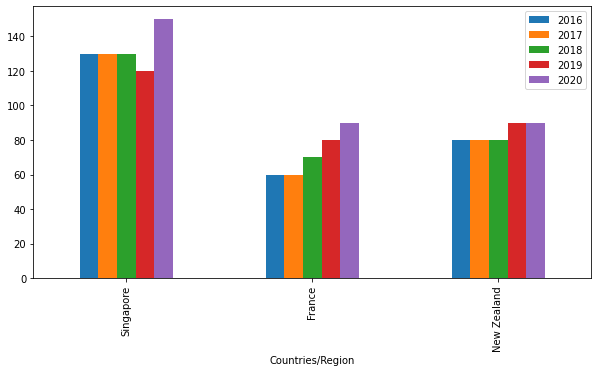

In [31]:
group_5 =ramen_demands.sample(3)
group_5.plot(kind="bar")


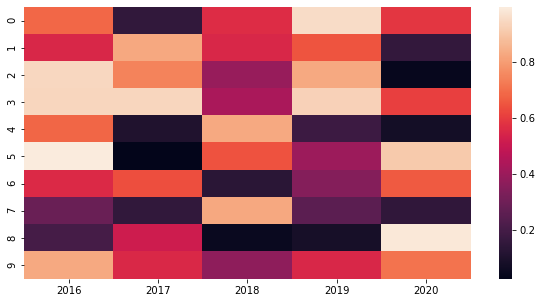

In [32]:
# Create a dataset
ramen_demands = pd.DataFrame(np.random.random((10,5)), columns=["2016","2017","2018","2019","2020"])

#Changing the x axis to coutries



# Default heatmap
p1 = sns.heatmap(ramen_demands)
